# Capstone Project : Kafka-esque Text Generation 

## Executive Summary
Literature is an important part of our education, it influences us and makes us understand other walks of life. Narratives, in particular, inspire empathy and give people a new perspective on their lives and that of others. However, creating stories requires a great amount of effort to brainstorm and produce. What if we could use a language model to understand writing patterns and create new stories. Frank Kafka was a German-speaking writer renowned for developing a unique genre of stories that fuse elements of realism and fantasy. His works have influenced other famous writers such as George Orwell and Haruki Murakami. This creative style is known as kafka-esque. For this study, we will be using the complete text from the english translation of "The Metamorphosis" to build a text generation model using natural language processing. 

A language model can predict the probability of the next word in the sequence, based on the words already observed in the sequence. Neural network models are a preferred method for developing statistical language models because they can use a distributed representation where different words with similar meanings have similar representation. Recurrent Neural Network is a generalization of feedforward neural network that has an internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. To evaluate the performance of the text generation model, we will use the cumulative BLEU scores and Rouge scores to compare our optimized models with the reference text generation model proposed by Jason Brownlee. 

We observe that the optimized model performs better than the reference model. Looking at the difference cumulative n-gram scores, the 1-gram score for the optimized model is slightly lower than the reference model. However, the 2-gram, 3-gram and 4-gram scores are significantly higher. This shows that the generated text sequences from the optimized model have a higher similarity to the reference text. Several hyperparameters were tuned in the reference model to derive the optimized model. First, the number of hidden neurons (units) was increased from 100 to 150. This increased the accuracy of the model but did not significantly contribute to better BLEU or ROUGE scores. Subsequently, dropout layers were added after each LSTM layer to reduce overfitting. In tuning the degree of dropout, a rate of 0.2 was found to be better than 0.1 based on literature review and testing. This addition only had a slight improvement on model performance. After which, a unidirectional LSTM layer was replaced with a birectional LSTM layer to observe if sutyding the past and future inputs helped. This addition produced a significant increase in the BLEU and ROGUE scores for the optimized model. 

The optimized model showed better BLEU and ROUGE scores than the reference model. Having tuned various hyperparameters in the optimized model, the two most significant changes that improved model performance were introducing a bidirectional LSTM layer and decreasing the batch size from 128 to 64. Other less significant changes include increasing the number of hidden neurons from 100 to 150, increasing the number of epochs from 100 to 150 and adding a dropout layer with dropout rate of 0.2 after each LSTM layer to reduce overfitting. Increasing the sequence length of the input text resulted in lower BLEU and ROUGE scores, hence a shorter sequence length would have better model performance. When considering different types of input text, unseen text from the same author achieved higher BLEU and ROUGE scores than an unseen text from a different author. However, the output text still referenced the main character and settings from the training text. 

## 1. Introduction

### Who is Frank Kafka?

Frank Kafka was a German-speaking writer renowned for developing a unique genre of stories that fuse elements of realism and fantasy. His works have influenced other famous writers such as George Orwell and Haruki Murakami. This creative style is known as kafka-esque.The best known works by Frank Kafka include "The Metamorphosis", "The Trial" and "The Castle". His works often feature characters facing bizarre predicaments and inflexible socio-bureaucratic powers, commonly exploring themes of alienation, existential anxiety, guilt, and absurdity.[1] 

For this study, we will be using the complete text from the english translation of "The Metamorphosis" to build a text generation model using natural language processing. The complete text is available from Project Gutenberg, an online library of free ebooks to encourage the creation and distribution of ebooks.[2] To test the text generation model further, we will input a random excerpt from "The Castle" by Frank Kafka to observe how the model performs on unseen text from the same author. In addition, we will input another excerpt from "Kafka on the Shore" by Haruki Murakami to test the model on unseen text from a separate author.

### Natural Language Processing
Natural language processing is the area of study dedicated to the automatic manipulation of speech and text by software. It is an old field of study, originally dominated by rule-based methods designed by linguists, then statistical methods and, more recently, deep learning methods that show great promise in the field.[3]

A language model can predict the probability of the next word in the sequence, based on the words already observed in the sequence. Neural network models are a preferred method for developing statistical language models because they can use a distributed representation where different words with similar meanings have similar representation. Furthermore, they can use a large context of recently observed words when making predictions. 

### RNN & LSTM
Recurrent Neural Network is a generalization of feedforward neural network that has an internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input.[4]

Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation. 

Bidirectional LSTMs can be used to train two sides, instead of one side of the input sequence. First from left to right on the input sequence and the second in reversed order of the input sequence. It provides one more context to the word to fit in the right context from words coming after and before, this results in faster and fully learning and solving a problem.[5]

## 2. Problem Statement
Literature is an important part of our education, it influences us and makes us understand other walks of life. Narratives, in particular, inspire empathy and give people a new perspective on their lives and that of others. However, creating stories requires a great amount of effort to brainstorm and produce. What if we could use a language model to understand writing patterns and create new stories. This could help us generate new ideas and aid in the creative process for a new piece of work. With the text generation model, a body of text can be produced from just a few lines of input text.

The text generation model will consider the words in the input sequence of text and predict the next possible word of the sequence. The process will be repeated until the specified number of output words are generated. The model will use natural language processing, language modelling, and deep learning. "The Metamorphosis" by Frank Kafka will be used as the reference text to create a word dictionary and generate a dataset of text sequences to train the model. The deep learning model will be built using LSTMs.

To evaluate the performance of the text generation model, we will use the cumulative BLEU scores and Rouge scores to compare our optimized models with the reference text generation model proposed by Jason Brownlee.[6]   

### BLEU Score 

BLEU is a precision focused metric that calculates n-gram overlap of the reference and generated texts. This n-gram overlap means the evaluation scheme is word-position independent apart from n-grams’ term associations. One thing to note in BLEU — there is a brevity penalty i.e. a penalty applied when the generated text is too small compared to the target text. In this study, Sentence BLEU score is used to evaluate a candidate sentence against one or more reference sentences.[7]

### ROUGE Score

The ROUGE Score or Recall-Oriented Understudy for Gisting Evaluation, is a set of metrics that measures the number of matching ‘n-grams’ between the model-generated text and a ‘reference’. This indicates the extent of similarity between the generated text and the reference text sequence.[8]

ROUGE-1 will measure the match-rate of unigrams between the model output and reference while ROUGE-2 will measure the match-rate of bigrams.  ROUGE-L measures the longest common subsequence (LCS) between our model output and reference by count the longest sequence of tokens that is shared between both. A longer shared sequence would indicate more similarity between the two sequences. 

Recall counts the number of overlapping n-grams found in both the model output and reference then divides this number by the total number of n-grams in the reference. This shows how well the output text relates to the reference text. The precision metric is calculated by dividing the number of overlapping n-grams found in the output text and the reference text by the output n-gram count. This gives a score relative to the output text rather than the reference. The f1 score is calculated using the recall and precision scores to give an overall score. 

## Project Outline

The project will be divided into several parts:
- Data Preparation
- Reference Model 
- Reference Model with Longer Sequence Input
- Model Optimization
- Reference Model Application
- Reference Model with Longer Sequence Input Application
- Optimized Model Application
- Results & Analysis
- Conclusion & Recommendations

## 2. Data Preparation - Metamorphosis Text

In data preparation, we will use and analyze the text from __"Metamorphosis by Frank Kafka"__ to train the language model.

In [1]:
# import libraries
import re
import string
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median

### 2.1 Load Text

In [2]:
# define function to load entire text file into memory and return it.
def load_doc(filename):
    file = open(filename, 'r', 
                encoding='utf-8')    # open the file as read only
    text = file.read()               # read all the text
    file.close()                     # close the file
    return text

In [3]:
# load Metamorphosis text, meta_text.txt 
in_filename = '../data/meta_text.txt'
doc = load_doc(in_filename)

#preview first 1000 characters 
print(doc[:1000])                 

﻿I

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin. He lay on his
armour-like back, and if he lifted his head a little he could see his
brown belly, slightly domed and divided by arches into stiff sections.
The bedding was hardly able to cover it and seemed ready to slide off
any moment. His many legs, pitifully thin compared with the size of the
rest of him, waved about helplessly as he looked.

“What’s happened to me?” he thought. It wasn’t a dream. His room, a
proper human room although a little too small, lay peacefully between
its four familiar walls. A collection of textile samples lay spread out
on the table—Samsa was a travelling salesman—and above it there hung a
picture that he had recently cut out of an illustrated magazine and
housed in a nice, gilded frame. It showed a lady fitted out with a fur
hat and fur boa who sat upright, raising a heavy fur muff that covered
the whole of her lower arm towards 

### 2.2 Sequence Length
We will explore the sequence lengths of sentences and paragraphs in the text to determine the input lengths and shape for model training.

In [4]:
# replace line breaks with space
new_doc = doc.replace('\n',' ')

In [5]:
print(new_doc)

﻿I  One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover it and seemed ready to slide off any moment. His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.  “What’s happened to me?” he thought. It wasn’t a dream. His room, a proper human room although a little too small, lay peacefully between its four familiar walls. A collection of textile samples lay spread out on the table—Samsa was a travelling salesman—and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice, gilded frame. It showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the whole of her lower arm towards 

#### Sentence Length

In [6]:
# split text by ". " to create a list of sentence strings
sentence = new_doc.split(". ")

In [7]:
sentence[:10]

['\ufeffI  One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin',
 'He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections',
 'The bedding was hardly able to cover it and seemed ready to slide off any moment',
 'His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked',
 ' “What’s happened to me?” he thought',
 'It wasn’t a dream',
 'His room, a proper human room although a little too small, lay peacefully between its four familiar walls',
 'A collection of textile samples lay spread out on the table—Samsa was a travelling salesman—and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice, gilded frame',
 'It showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the 

In [8]:
# convert sentence strings into strings of text
new_sentence = []
for i in sentence:
    new_sentence.append(i.split(' '))

print(new_sentence[:10])

[['\ufeffI', '', 'One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin'], ['He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections'], ['The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment'], ['His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked'], ['', '“What’s', 'happened', 'to', 'me?”', 'he', 'thought'], ['It', 'wasn’t', 'a', 'dream'], ['His', 'room,', 'a', 'proper', 'human', 'room', 'although', 'a', 'little', 'too', 'small,', 'lay', 'peacefully', 'between', 'its', 'four', 'familiar', 'walls'], ['

In [9]:
# get a list of word counts for each sentence 
len_sentence = []
for i in new_sentence:
    len_sentence.append(len(i))

print(len_sentence[:20])

[22, 29, 16, 20, 7, 4, 18, 38, 32, 13, 15, 44, 16, 41, 20, 55, 90, 8, 12, 6]


In [10]:
print("Average number of words in each sentence: ", int(mean(len_sentence)))
print("Median number of words in each sentence: ", int(median(len_sentence)))

Average number of words in each sentence:  30
Median number of words in each sentence:  27


In [11]:
print("Min Sentence Length: ", int(min(len_sentence)))
print("Max Sentence Length: ", int(max(len_sentence)))

Min Sentence Length:  1
Max Sentence Length:  155


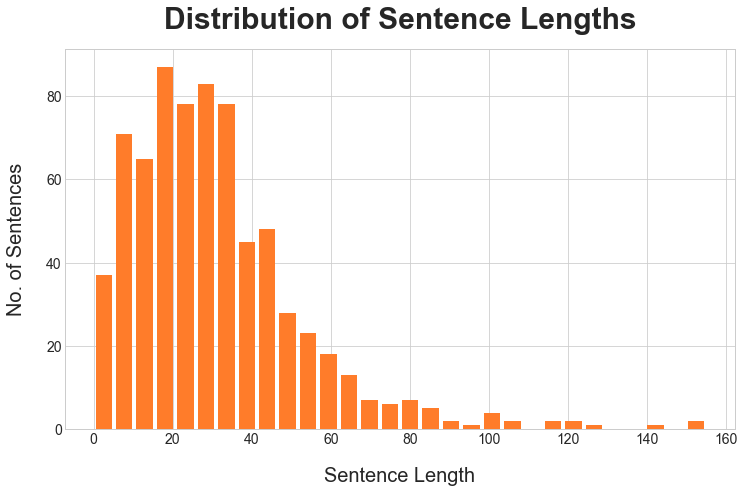

In [20]:
# distribution of sentence lengths
 
# setting the ranges and no. of intervals
range = (0, max(len_sentence))
bins = 30

# set dataset, x
x = len_sentence

# figure size and plot style
plt.figure(figsize=(12,7)) 
plt.style.use('seaborn-whitegrid') 

# plotting a histogram, x = len_para
plt.hist(x, bins, range, histtype = 'bar', rwidth = 0.8, facecolor = '#ff7c2a', linewidth=0.5)

# plot title
plt.title('Distribution of Sentence Lengths', fontsize=30, pad=20, weight='bold')
# x-axis label
plt.xlabel('Sentence Length', fontsize=20, labelpad=20)
# frequency label
plt.ylabel('No. of Sentences', fontsize=20, labelpad=20)
# x-ticks
plt.xticks(fontsize=14)
# y-ticks
plt.yticks(fontsize=14)


# function to show the plot
plt.show()

The average number of words in each sentence is 30 words and the median number of words is 27. Based on the reference text generation model, the suggested sequence length is 50 words. Hence for this study, we will use sequence length of 50 words for the reference model.

#### Paragraph Length

In [13]:
# split text by double space to create list of paragraph strings
para = new_doc.split('  ')

In [14]:
# preview first 5 paragrapgh strings
print(para[:5])

['\ufeffI', 'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover it and seemed ready to slide off any moment. His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.', '“What’s happened to me?” he thought. It wasn’t a dream. His room, a proper human room although a little too small, lay peacefully between its four familiar walls. A collection of textile samples lay spread out on the table—Samsa was a travelling salesman—and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice, gilded frame. It showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the whole of her lower a

In [15]:
# convert paragraph strings into strings of text
new_para = []
for i in para:
    new_para.append(i.split(' '))

print(new_para[:5])

[['\ufeffI'], ['One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.'], ['“What’s', 'happened', 'to', 'me?”', 'he', 'thought.', 'It', 'wasn’t', 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human', 'room', 'although', 'a', 'little', 'too', 'small,', 'lay', 'peacefully', 'between', 'its', 'four', 'familiar', 'walls.', 'A', 'collec

In [16]:
# get a list of word counts for each paragraph
len_para = []
for i in new_para:
    len_para.append(len(i))

print(len_para)

[1, 85, 98, 128, 164, 229, 310, 337, 126, 140, 101, 121, 213, 154, 142, 364, 116, 370, 201, 277, 221, 231, 188, 190, 310, 210, 233, 387, 126, 478, 832, 1, 2, 179, 175, 182, 141, 177, 84, 732, 112, 157, 207, 122, 435, 104, 174, 239, 217, 224, 310, 252, 753, 177, 191, 212, 213, 121, 134, 318, 240, 883, 1, 2, 88, 133, 156, 118, 276, 387, 598, 370, 389, 276, 135, 285, 168, 441, 520, 131, 74, 39, 54, 96, 15, 24, 32, 40, 203, 136, 184, 78, 186, 198, 281, 71, 85, 45, 366, 335, 119, 255, 1, 2]


In [17]:
print("Average number of words in each paragraph: ", mean(len_para))
print("Median number of words in each paragraph: ", median(len_para))

Average number of words in each paragraph:  211
Median number of words in each paragraph:  178.0


In [18]:
print("Min Sentence Length: ", int(min(len_para)))
print("Max Sentence Length: ", int(max(len_para)))

Min Sentence Length:  1
Max Sentence Length:  883


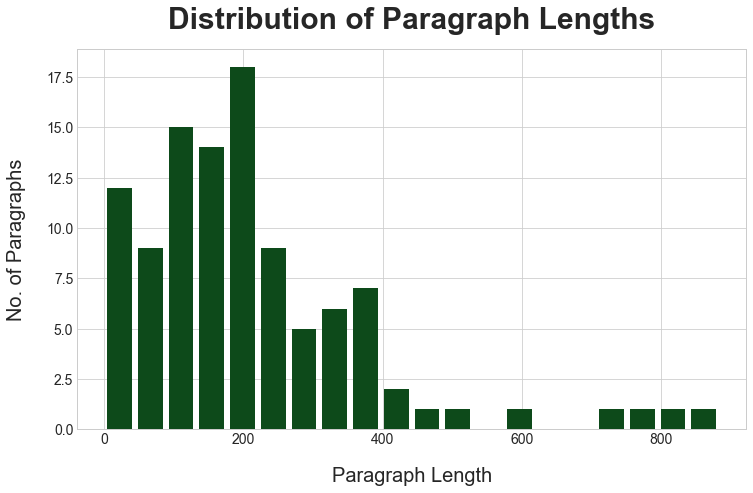

In [21]:
# distribution of paragraph lengths
 
# setting the ranges and no. of intervals
range = (0, max(len_para))
bins = 20 

# set dataset, x
x = len_para

# figure size and plot style
plt.figure(figsize=(12,7)) 
plt.style.use('seaborn-whitegrid') 
 
# plotting a histogram, x = len_para
plt.hist(x, bins, range, histtype = 'bar', rwidth = 0.8, facecolor = '#0d4a1a', linewidth=0.5)

# plot title
plt.title('Distribution of Paragraph Lengths', fontsize=30, pad=20, weight='bold')
# x-axis label
plt.xlabel('Paragraph Length', fontsize=20, labelpad=20)
# frequency label
plt.ylabel('No. of Paragraphs', fontsize=20, labelpad=20)
# x-ticks
plt.xticks(fontsize=14)
# y-ticks
plt.yticks(fontsize=14)

 
# function to show the plot
plt.show()

The average number of words in each paragraph is 211 words and the median number of words is 178. In deciding on the sequence length we could round down the average number of words to 200 to observe if inputing a paragraph of text would give a better result that inputting a sentence. However, a sequence length of 200 may require a very long time to train the model. We could use a seqeunce length of 100 and adjust the sequence length incrementally by 50 words to observe if longer seqeunce lengths provide better results.